In [1]:
# import dataset downloaded from Kaggle 
import pandas as pd

import warnings  # ignore all warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("placement.csv") # Read dataset from local directory

In [2]:
# Check shape
df.shape

(200, 2)

In [3]:
# how's dataset look 
df.head(10)

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
5,7.89,2.99
6,6.73,2.60
7,6.75,2.48
8,6.09,2.31
9,8.31,3.51


In [4]:
# Check Data Type of Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [5]:
# Check missing value
df.isnull().sum()

cgpa       0
package    0
dtype: int64

In [6]:
# check data look mathematically
df.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


In [7]:
# Check duplicate values
df.duplicated().sum()

np.int64(0)

Visualize Dataset

In [8]:
# import data vizualization tools
import matplotlib.pyplot as plt
import seaborn as sns

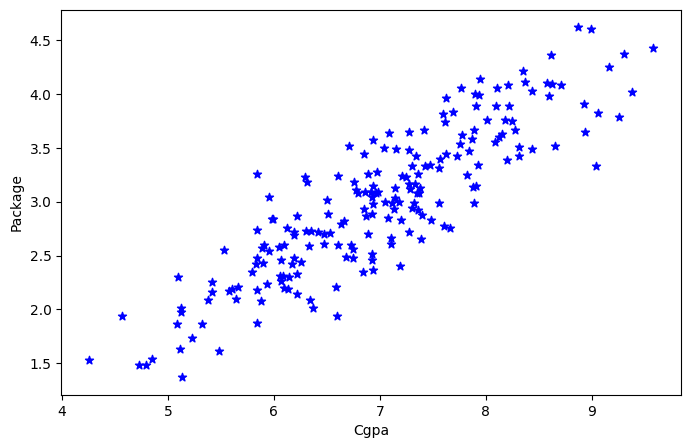

In [9]:
plt.figure(figsize=(8, 5))
plt.xlabel('Cgpa')
plt.ylabel('Package')
plt.scatter(df.cgpa,df.package,color='blue',marker='*')
plt.show()

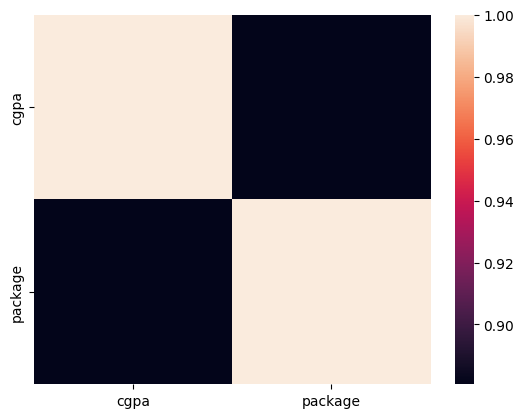

In [22]:
# Heatmap of cor-relation
sns.heatmap(df.corr())
plt.show()

Train Model

In [10]:
# Segregate dataset into X and y
X = df[['cgpa']]
y = df['package']

In [11]:
# split X and y in train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [12]:
# Model Train on Simple Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
# Check Score at Train and Test Data
print('Score at Train Data',lr.score(X_train,y_train)*100)
print('Score at Test Data',lr.score(X_test,y_test)*100)

Score at Train Data 77.58339025733345
Score at Test Data 77.30984312051673


In [14]:
# Make Prediction on Test Data
y_pred = lr.predict(X_test)

In [15]:
# import neccessary metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [16]:
# Check Accuracy
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R2 Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.2315
Mean Squared Error (MSE): 0.0842
R2 Score: 0.7731


Plot regression line

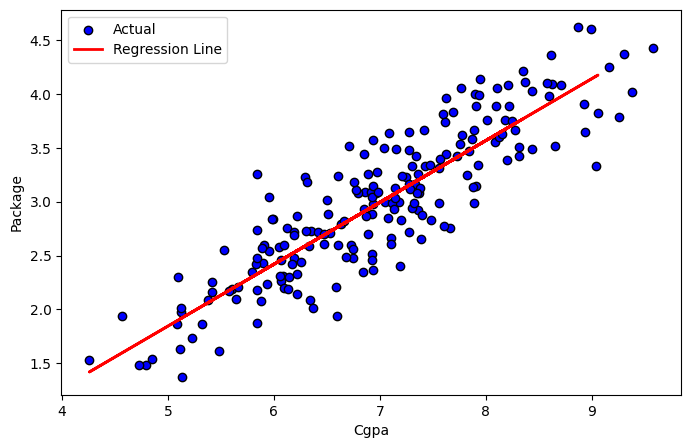

In [17]:
plt.figure(figsize=(8, 5))
plt.xlabel('Cgpa')
plt.ylabel('Package')
plt.scatter(df.cgpa,df.package, color='blue', label="Actual", edgecolor='k')
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Regression Line")
plt.legend()
plt.show()

Coefficient interpretation

In [18]:
slope = lr.coef_[0]
intercept = lr.intercept_

print(f"\nRegression Line Equation: y = {slope:.2f} * X + ({intercept:.2f})")


Regression Line Equation: y = 0.57 * X + (-1.03)


Test Model

In [21]:
cgpa = float(input("Enter Your CGPA:"))
package = lr.predict([[cgpa]])[0]
print(f"At This Cgpa:{cgpa},Your Package is:{package}")

At This Cgpa:8.5,Your Package is:3.854173080512107
